<a href="https://colab.research.google.com/github/nehadubey1205/NLP-college/blob/main/ResearchPaper_SentEmoNehaDubey_016.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment-1

In [217]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt

In [ ]:
drive.mount("/content/drive/", force_remount=True)

Mounted at /content/drive/


In [218]:
data= pd.read_csv(r'/content/drive/MyDrive/Bully_Sent_Emo_IEEEIC_6084.csv')
data.head(10)

,Tweets,Processed_Tweets,Bully_Label,Sentiment_label,Emotion_label
0,Teri maa ki chut me Shivsena ka lund gaya kya,Teri maa ki chut me Shivsena ka lund gaya kya,1,Negative,Anger
1,Han muje pata hai teri maa ka ke gufa me jati thi,Han muje pata hai teri maa ka ke gufa me jati thi,1,Negative,Others
2,Tum kaha se aa gye bhai tumlog toh saree pehen...,Tum kaha se aa gye bhai tumlog toh saree pehen...,0,Neutral,Others
3,Koi moti🙊kisi ki besti😁 baisn ka or channey ki...,Koi motikisi ki besti baisn ka or channey ki d...,1,Negative,Disgust
4,Rahul kanwal aaj nanga hoke road per nachega 😂,Rahul kanwal aaj nanga hoke road per nachega,1,Negative,Disgust
5,@riteshrajwada Good morning Raj bhaiya apka di...,Good morning Raj bhaiya apka din behad khubsur...,0,Positive,Happiness
6,Tera baap bi paltu kutta Hoga Teri maa ka agar...,Tera baap bi paltu kutta Hoga Teri maa ka agar...,1,Negative,Others
7,Kya be tihari fan \nHar baar gandu ki har...,Kya be tihari fan Har baar gandu ki harah aa j...,1,Negative,Disgust
8,@apeidiotstuff Hi deer\n\nYara tum ko shaadi p...,Hi deerYara tum ko shaadi py dekha thaBuht khu...,0,Positive,Happiness
9,@iffii_khan1 @HoorainPervaiz @RehamKhan1 Randi...,Randi k bachy is thran 1947 mai tu chi thi nim...,1,Negative,Disgust


In [219]:
data = data.apply(lambda x: x.astype(str).str.lower())

In [220]:
data.head(2)

,Tweets,Processed_Tweets,Bully_Label,Sentiment_label,Emotion_label
0,teri maa ki chut me shivsena ka lund gaya kya,teri maa ki chut me shivsena ka lund gaya kya,1,negative,anger
1,han muje pata hai teri maa ka ke gufa me jati thi,han muje pata hai teri maa ka ke gufa me jati thi,1,negative,others


In [221]:
data['Sentiment_label'].value_counts()

negative    3227
positive    1530
neutral     1327
Name: Sentiment_label, dtype: int64

In [222]:
data['Bully_Label'].value_counts()# positive and neutral =0 , negative =1

1    3050
0    3034
Name: Bully_Label, dtype: int64

In [223]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6084 entries, 0 to 6083
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Tweets            6084 non-null   object
 1   Processed_Tweets  6084 non-null   object
 2   Bully_Label       6084 non-null   object
 3   Sentiment_label   6084 non-null   object
 4   Emotion_label     6084 non-null   object
dtypes: object(5)
memory usage: 237.8+ KB


In [97]:
data.isnull().sum()

Tweets              0
Processed_Tweets    0
Bully_Label         0
Sentiment_label     0
Emotion_label       0
dtype: int64

Question-2

In [98]:
data.shape

(6084, 5)

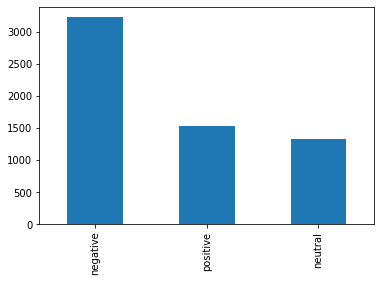

In [224]:
#data = data(np.random.rand(10, 4), columns=['Bully_Label',	'Sentiment_label','Emotion_label'])
df = pd.DataFrame(data, columns=['Bully_Label',	'Sentiment_label','Emotion_label'])
#df.plot(x="Emotion_label", y=['Bully_Label'], kind="bar", figsize=(9, 8))
#[1261]: df2.plot(kind='bar');


df['Sentiment_label'].value_counts().plot(kind='bar')

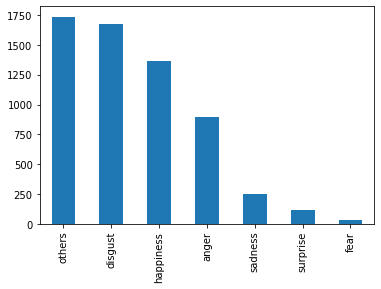

In [100]:
df['Emotion_label'].value_counts().plot(kind='bar')

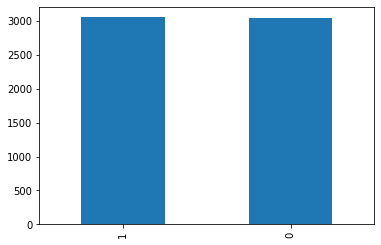

In [102]:
df['Bully_Label'].value_counts().plot(kind='bar')

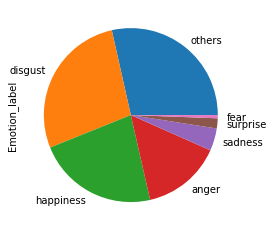

In [103]:
df['Emotion_label'].value_counts().head(10).plot.pie()

# Unsquish the pie.
import matplotlib.pyplot as plt
plt.gca().set_aspect('equal')

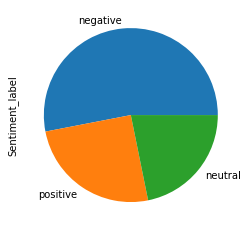

In [104]:
df['Sentiment_label'].value_counts().head(10).plot.pie()

plt.gca().set_aspect('equal')

In [13]:
from collections import Counter 

Q-3, word count

In [105]:
df['Emotion_label'].value_counts()

others       1735
disgust      1678
happiness    1367
anger         900
sadness       254
surprise      114
fear           36
Name: Emotion_label, dtype: int64

Question-4
''Preprocessing: Create a new column ‘preprocessed_text’ ''

In [ ]:
from google.colab import files

In [225]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = set(stopwords.words('hinglish'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [226]:
print(stop)

{'mjhe', "hadn't", 'rha', "aren't", 'through', 'kari', 'novel', "weren't", 'ask', 'ought', 'likely', 'meri', 'phla', 'someone', "wouldn't", 'looks', 'nd', 'on', 'should', 'si', 'havent', 'that', 'think', 'also', 'let', 'downwards', 'true', 'perhaps', "i'll", 'teen', 'kahin', 'becoming', 'kinhe', 'thinking', 'ab', 'thoda', 'whether', 'mat', 'one', 'here', 'maano', 'raha', 'ourselves', 'wali', 'krna', 've', 'kara', 'almost', 'sang', 'anyways', "it'll", 'liye', 'de', 'karen', 'avum', 'banae', 'q', 'forth', 'gayi', 'kinka', "there's", 'am', 'apan', 'bolo', 'karega', 'tjhe', 'upon', 'waala', 'who', 'onto', "she's", 'jiske', 'aisa', 'later', 'obviously', 'kahan', 'up', 'her', 'his', 'hui', 'kiski', 'hamare', 'par', 'vale', 'karun', 'waise', 'unlikely', 'used', 'for', 'ityadi', 'mana', 'aapne', 'hopefully', 'kaunsa', 'apni', 'gives', 'wouldn', 'well', 'vahin', 'bani', 'maani', 'cannot', 'hotaa', 'sent', 'everyone', 'while', 'kisi', 'unki', 'kafi', 'thereupon', 'jiska', 'arent', 'keeps', 'othe

In [227]:
data['tweet_stopwords'] = data['Tweets'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [228]:
data.head()

,Tweets,Processed_Tweets,Bully_Label,Sentiment_label,Emotion_label,tweet_stopwords
0,teri maa ki chut me shivsena ka lund gaya kya,teri maa ki chut me shivsena ka lund gaya kya,1,negative,anger,maa chut shivsena lund
1,han muje pata hai teri maa ka ke gufa me jati thi,han muje pata hai teri maa ka ke gufa me jati thi,1,negative,others,muje maa gufa jati
2,tum kaha se aa gye bhai tumlog toh saree pehen...,tum kaha se aa gye bhai tumlog toh saree pehen...,0,neutral,others,aa gye tumlog saree pehen chup baithe aahe cho...
3,koi moti🙊kisi ki besti😁 baisn ka or channey ki...,koi motikisi ki besti baisn ka or channey ki d...,1,negative,disgust,moti🙊kisi besti😁 baisn channey dal halwa kha t...
4,rahul kanwal aaj nanga hoke road per nachega 😂,rahul kanwal aaj nanga hoke road per nachega,1,negative,disgust,rahul kanwal nanga hoke road nachega 😂


In [ ]:
#data['Stop_words']=data['Processed_Tweets'].apply(lambda x: len(set(x.split())& stopwrd))

In [229]:
from nltk.stem import WordNetLemmatizer
from nltk import tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import re

In [230]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [231]:
import nltk

nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

In [232]:
data['After_lemma'] = [''.join([WordNetLemmatizer().lemmatize(re.sub('[^A-Za-z]',' ',text)) for text in lis]) for lis in data['tweet_stopwords']]
#test['text_lem'] = [''.join([WordNetLemmatizer().lemmatize(re.sub('[^A-Za-z]',' ',text)) for text in lis]) for lis in test['tweet']]

In [114]:
data.tail(3)
# devnagiri word not showing after lemma(6083 row)

,Tweets,Processed_Tweets,Bully_Label,Sentiment_label,Emotion_label,tweet_stopwords,After_lemma
6081,khatna pe to bol diya ek baat bata upar wala t...,khatna pe to bol diya ek baat bata upar wala t...,1,negative,others,khatna baat nanga paida nanga rahta kapda pehn…,khatna baat nanga paida nanga rahta kapda pehn
6082,chal be bhadwe sanghi.. teri maa ki choot me g...,chal be bhadwe sanghi teri maa ki choot me gho...,1,negative,disgust,bhadwe sanghi.. maa choot ghode la lund. zinda...,bhadwe sanghi maa choot ghode la lund zinda...
6083,"इश्क़ में थे जब,\nवादा हमारा,\nदावा भी हमारा,\...",इश्क़ में थे जबवादा हमारादावा भी हमाराधोखा उनक...,0,neutral,sadness,"इश्क़ में थे जब, वादा हमारा, दावा भी हमारा, धो...",...


In [30]:
#ab = data['After_lemma']
#print(ab.loc[[6083]])

6083                                                  ...
Name: After_lemma, dtype: object


In [ ]:
#data.drop(6083)# this is the only row which is different, so I am dropping this

In [189]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
nltk.download('punkt')

ps = PorterStemmer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
#pip install inltk

In [ ]:
#from inltk.inltk import setup
#setup('hi')

In [ ]:
#setup('hi')

In [190]:
#5. POS Tagging 

from collections import Counter
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [233]:
data.head(2)

,Tweets,Processed_Tweets,Bully_Label,Sentiment_label,Emotion_label,tweet_stopwords,After_lemma
0,teri maa ki chut me shivsena ka lund gaya kya,teri maa ki chut me shivsena ka lund gaya kya,1,negative,anger,maa chut shivsena lund,maa chut shivsena lund
1,han muje pata hai teri maa ka ke gufa me jati thi,han muje pata hai teri maa ka ke gufa me jati thi,1,negative,others,muje maa gufa jati,muje maa gufa jati


Save this processed data as CSV file for  further use # question 7

In [235]:
data.to_csv('/content/drive/My Drive/Colab Notebooks/NLP Assignment/Bully_csv_file.csv')

# Question -6 **Find length of text, punctuation, stop word**

In [236]:
data['Processed_Tweets_len']  = data['Processed_Tweets'].str.len()
data.head(3)
# length of the text

,Tweets,Processed_Tweets,Bully_Label,Sentiment_label,Emotion_label,tweet_stopwords,After_lemma,Processed_Tweets_len
0,teri maa ki chut me shivsena ka lund gaya kya,teri maa ki chut me shivsena ka lund gaya kya,1,negative,anger,maa chut shivsena lund,maa chut shivsena lund,45
1,han muje pata hai teri maa ka ke gufa me jati thi,han muje pata hai teri maa ka ke gufa me jati thi,1,negative,others,muje maa gufa jati,muje maa gufa jati,49
2,tum kaha se aa gye bhai tumlog toh saree pehen...,tum kaha se aa gye bhai tumlog toh saree pehen...,0,neutral,others,aa gye tumlog saree pehen chup baithe aahe cho...,aa gye tumlog saree pehen chup baithe aahe cho...,100


In [237]:
data['tweet_stopwords_len']  = data['tweet_stopwords'].str.len()
data.head(4)
# length of stop word

,Tweets,Processed_Tweets,Bully_Label,Sentiment_label,Emotion_label,tweet_stopwords,After_lemma,Processed_Tweets_len,tweet_stopwords_len
0,teri maa ki chut me shivsena ka lund gaya kya,teri maa ki chut me shivsena ka lund gaya kya,1,negative,anger,maa chut shivsena lund,maa chut shivsena lund,45,22
1,han muje pata hai teri maa ka ke gufa me jati thi,han muje pata hai teri maa ka ke gufa me jati thi,1,negative,others,muje maa gufa jati,muje maa gufa jati,49,18
2,tum kaha se aa gye bhai tumlog toh saree pehen...,tum kaha se aa gye bhai tumlog toh saree pehen...,0,neutral,others,aa gye tumlog saree pehen chup baithe aahe cho...,aa gye tumlog saree pehen chup baithe aahe cho...,100,80
3,koi moti🙊kisi ki besti😁 baisn ka or channey ki...,koi motikisi ki besti baisn ka or channey ki d...,1,negative,disgust,moti🙊kisi besti😁 baisn channey dal halwa kha t...,moti kisi besti baisn channey dal halwa kha t...,192,237


In [ ]:
#This would remove all characters except alphabets and digits.

#data['Punctuation'] = data['After_lemma'].apply(lambda x: re.sub('[^A-Za-z0-9]', ' ', x))

In [238]:
def check_find_punctuations(text):
    
    # regular expression containing
    # all punctuation
    result = re.findall(r'[!"\$%&\'()*+,\-.\/:;=#@?\[\\\]^_`{|}~]*', 
                        text)
      
    # form a string
    string = "".join(result)
      
    # list of strings return
    return list(string)
    
# creating new column name
# as a punctuation_used and 
# applying user defined function
# on each rows of Comments column
data['punct_'] = data['After_lemma'].apply(
                         lambda x : check_find_punctuations(x)
                         )
  
# show the Dataframe
data.head()

,Tweets,Processed_Tweets,Bully_Label,Sentiment_label,Emotion_label,tweet_stopwords,After_lemma,Processed_Tweets_len,tweet_stopwords_len,punct_
0,teri maa ki chut me shivsena ka lund gaya kya,teri maa ki chut me shivsena ka lund gaya kya,1,negative,anger,maa chut shivsena lund,maa chut shivsena lund,45,22,[]
1,han muje pata hai teri maa ka ke gufa me jati thi,han muje pata hai teri maa ka ke gufa me jati thi,1,negative,others,muje maa gufa jati,muje maa gufa jati,49,18,[]
2,tum kaha se aa gye bhai tumlog toh saree pehen...,tum kaha se aa gye bhai tumlog toh saree pehen...,0,neutral,others,aa gye tumlog saree pehen chup baithe aahe cho...,aa gye tumlog saree pehen chup baithe aahe cho...,100,80,[]
3,koi moti🙊kisi ki besti😁 baisn ka or channey ki...,koi motikisi ki besti baisn ka or channey ki d...,1,negative,disgust,moti🙊kisi besti😁 baisn channey dal halwa kha t...,moti kisi besti baisn channey dal halwa kha t...,192,237,[]
4,rahul kanwal aaj nanga hoke road per nachega 😂,rahul kanwal aaj nanga hoke road per nachega,1,negative,disgust,rahul kanwal nanga hoke road nachega 😂,rahul kanwal nanga hoke road nachega,44,38,[]


In [239]:
data["mentions"]=data["After_lemma"].str.count("@")
data.head(2)

,Tweets,Processed_Tweets,Bully_Label,Sentiment_label,Emotion_label,tweet_stopwords,After_lemma,Processed_Tweets_len,tweet_stopwords_len,punct_,mentions
0,teri maa ki chut me shivsena ka lund gaya kya,teri maa ki chut me shivsena ka lund gaya kya,1,negative,anger,maa chut shivsena lund,maa chut shivsena lund,45,22,[],0
1,han muje pata hai teri maa ka ke gufa me jati thi,han muje pata hai teri maa ka ke gufa me jati thi,1,negative,others,muje maa gufa jati,muje maa gufa jati,49,18,[],0


In [240]:
data['punct']  = data['punct_'].str.len()
data.head(4)

,Tweets,Processed_Tweets,Bully_Label,Sentiment_label,Emotion_label,tweet_stopwords,After_lemma,Processed_Tweets_len,tweet_stopwords_len,punct_,mentions,punct
0,teri maa ki chut me shivsena ka lund gaya kya,teri maa ki chut me shivsena ka lund gaya kya,1,negative,anger,maa chut shivsena lund,maa chut shivsena lund,45,22,[],0,0
1,han muje pata hai teri maa ka ke gufa me jati thi,han muje pata hai teri maa ka ke gufa me jati thi,1,negative,others,muje maa gufa jati,muje maa gufa jati,49,18,[],0,0
2,tum kaha se aa gye bhai tumlog toh saree pehen...,tum kaha se aa gye bhai tumlog toh saree pehen...,0,neutral,others,aa gye tumlog saree pehen chup baithe aahe cho...,aa gye tumlog saree pehen chup baithe aahe cho...,100,80,[],0,0
3,koi moti🙊kisi ki besti😁 baisn ka or channey ki...,koi motikisi ki besti baisn ka or channey ki d...,1,negative,disgust,moti🙊kisi besti😁 baisn channey dal halwa kha t...,moti kisi besti baisn channey dal halwa kha t...,192,237,[],0,0


In [128]:
''' data['punct'] = df['After_lemma'].str.replace(r'[!"\$%&\'()*+,\-.\/:;=#@?\[\\\]^_`{|}~]*', '')
print(data) '''

' data[\'punct\'] = df[\'After_lemma\'].str.replace(r\'[!"\\$%&\'()*+,\\-.\\/:;=#@?\\[\\\\]^_`{|}~]*\', \'\')\nprint(data) '

Find correlation

In [242]:
import seaborn as sns

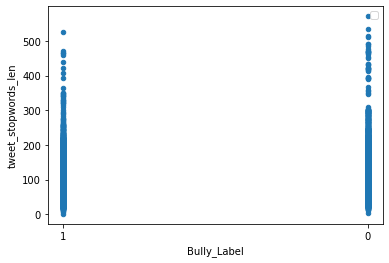

In [243]:
data.plot.scatter(x='Bully_Label', y='tweet_stopwords_len')
plt.legend()
plt.show()

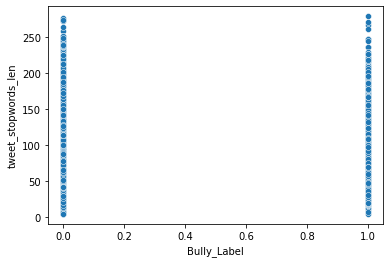

In [ ]:
#import seaborn as sns
#sns.scatterplot(x= data['tweet_stopwords_len'], y= data['Bully_Label'])
#sns.scatterplot(x= data['Bully_Label'], y= data['tweet_stopwords_len'])

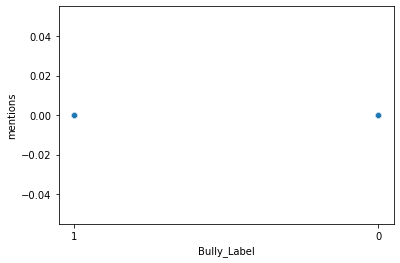

In [205]:
sns.scatterplot(x= data['Bully_Label'], y= data['mentions'])

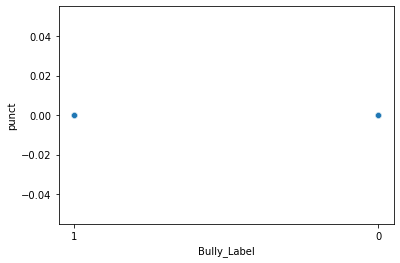

In [206]:
sns.scatterplot(x= data['Bully_Label'], y= data['punct'])

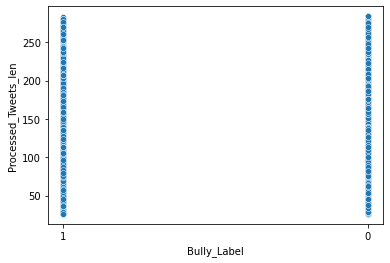

In [207]:
sns.scatterplot(x= data['Bully_Label'], y= data['Processed_Tweets_len'])

In [244]:
# create word cloud
from wordcloud import WordCloud

In [209]:
#text = " ".join(i for i in data.After_lemma)

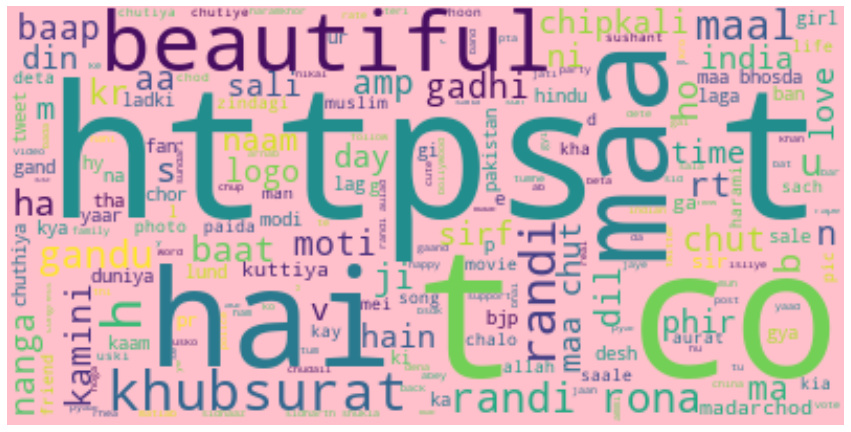

In [245]:
wordcloud = WordCloud( background_color="pink").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Question 7

*performing on original data*

for original as P1

https://www.analyticsvidhya.com/blog/2021/03/language-detection-using-natural-language-processing/

https://www.analyticsvidhya.com/blog/2022/07/sentiment-analysis-using-python/

In [281]:
#Loading the Dataset
#import pandas as pd
#data = pd.read_csv('Finance_data.csv')
data1 = pd.read_csv(r'/content/drive/MyDrive/Bully_Sent_Emo_IEEEIC_6084.csv')
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
P1 = cv.fit_transform(data1['Processed_Tweets'])
P1.shape



(6084, 21564)

In [282]:
#from sklearn.model_selection import train_test_split
#Splitting the data into trainig and testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(P1, data1['Bully_Label'], test_size=0.2, random_state=5)

Apply Naive Bays -> P1 + BOW

In [283]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train, Y_train)
#Caluclating the accuracy score of the model
from sklearn import metrics
predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, Y_test)
print("Accuracuy Score: ",accuracy_score)

Accuracuy Score:  0.8134757600657354


Consider processed data as P2 and apply BOW and Naive Bays

In [284]:
data2 = pd.read_csv(r'/content/drive/My Drive/Colab Notebooks/NLP Assignment/Bully_csv_file.csv')

In [285]:
data2.head()

,Unnamed: 0,Tweets,Processed_Tweets,Bully_Label,Sentiment_label,Emotion_label,tweet_stopwords,After_lemma
0,0,teri maa ki chut me shivsena ka lund gaya kya,teri maa ki chut me shivsena ka lund gaya kya,1,negative,anger,maa chut shivsena lund,maa chut shivsena lund
1,1,han muje pata hai teri maa ka ke gufa me jati thi,han muje pata hai teri maa ka ke gufa me jati thi,1,negative,others,muje maa gufa jati,muje maa gufa jati
2,2,tum kaha se aa gye bhai tumlog toh saree pehen...,tum kaha se aa gye bhai tumlog toh saree pehen...,0,neutral,others,aa gye tumlog saree pehen chup baithe aahe cho...,aa gye tumlog saree pehen chup baithe aahe cho...
3,3,koi moti🙊kisi ki besti😁 baisn ka or channey ki...,koi motikisi ki besti baisn ka or channey ki d...,1,negative,disgust,moti🙊kisi besti😁 baisn channey dal halwa kha t...,moti kisi besti baisn channey dal halwa kha t...
4,4,rahul kanwal aaj nanga hoke road per nachega 😂,rahul kanwal aaj nanga hoke road per nachega,1,negative,disgust,rahul kanwal nanga hoke road nachega 😂,rahul kanwal nanga hoke road nachega


In [286]:
#BOW
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
P2 = cv.fit_transform(data2['After_lemma'])
P2.shape

(6084, 24231)

In [287]:
#train Test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(P2, data2['Bully_Label'], test_size=0.2, random_state=5)

In [288]:
#Naive Bayes
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train, Y_train)
#Caluclating the accuracy score of the model
from sklearn import metrics
predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, Y_test)
print("Accuracuy Score: ",accuracy_score)

Accuracuy Score:  0.8208709942481512


TFIDF +NAIVE BAYS

In [289]:
# TFIDF
#this is for P1( here i am considering as x)
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer()
x = v.fit_transform(data1['Processed_Tweets'])

In [290]:
#The output of fit_transform will be a sparse matrix, if you want to visualize it you can do
x.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [291]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, data1['Bully_Label'], test_size=0.2, random_state=5)

In [292]:
#Naive Bayes
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train, Y_train)
#Caluclating the accuracy score of the model
from sklearn import metrics
predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, Y_test)
print("Accuracuy Score: ",accuracy_score)

Accuracuy Score:  0.8085456039441249


In [298]:
# this is for P2 
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer()
p2 = v.fit_transform(data2['After_lemma'])

p2.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.18137393, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [299]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(p2, data2['Bully_Label'], test_size=0.2, random_state=5)

In [300]:
#Naive Bayes
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train, Y_train)
#Caluclating the accuracy score of the model
from sklearn import metrics
predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, Y_test)
print("Accuracuy Score: ",accuracy_score)

Accuracuy Score:  0.8184059161873459
